In [1]:
import sys
import time

import numpy as np

sys.path.extend(['./../lib', './../helpers'])
from solver import Solver
from helpers import save_mnet as save
from helpers import load_mnet as load
from helpers import show_mnet_ord as show_ord
from helpers import show_mnet_ords as show_ords

from helpers import init_jupyter; init_jupyter()

fpath = './data/eq-1d_drift_linear'

Start | 11:55AM MSK on Sep 04, 2019 |
-------------------------------------


<div class="head1">
    <div class="head1__name">
        Equation and parameters
    </div>
</div>

In [2]:
A = 1.
s = 1.
Dc = 0.5

t_min = 0.
t_max = 1.
x_min = -5.
x_max = +5.

def func_f0(x, t):
    m = 0.
    return A * (m - x)

def func_f1(x, t):
    return -A * np.ones(x.shape)

def func_xm(t, x0):
    return np.exp(-A * t) * x0
 
def func_xc(t):
    return (1. - np.exp(-2. * A * t)) / 2. / A

def func_r0(x):
    m = 0.
    r = np.exp(-0.5 * (x - m)**2 / s) / np.sqrt(2. * np.pi * s)
    return r.reshape(-1)

def func_rx(x, t, x0):
    m = func_xm(t, x0)
    c = func_xc(t)
    r = np.exp(-0.5 * (x - m)**2 / c) / np.sqrt(2. * np.pi * c)
    return r.reshape(-1)

def func_rt(x, t):
    S = func_xc(t) + s * np.exp(-2. * A * t)
    r = np.exp(-0.5 * x**2 / S) / np.sqrt(2. * np.pi * S)
    return r.reshape(-1)

def func_rs(x):
    r = np.sqrt(A / np.pi) * np.exp(- A * x * x)
    return r.reshape(-1)

<div class="head1">
    <div class="head1__name">
        Options (will be saved)
    </div>
</div>

In [4]:
DATA = {} # Dict with computation results
opts = { 'A': A, 's': s, 'Dc': Dc, 't_min': t_min, 't_max': t_max, 'x_min': x_min, 'x_max': x_max }

M = [10, 100, 1000, 10000, 100000]
N = list(np.arange(10, 51, 5, dtype=int))

<div class="head1">
    <div class="head1__name">
        Helpers
    </div>
</div>

In [5]:
def calc(SL, m, n, E, T):
    if not E.get(m): E[m] = []
    if not T.get(m): T[m] = []
        
    SL.set_grid_t(m, t_min, t_max, t_hst=1)
    SL.set_grid_x(n, x_min, x_max)
    SL.set_funcs(func_f0, func_f1, func_r0, func_rt, func_rs)
    SL.set_coefs(Dc)
    SL.prep()
    SL.calc()

    T[m].append([SL._t_prep, SL._t_calc, SL._t_spec])
    E[m].append(SL._err)

<div class="head1">
    <div class="head1__name">
        Computations for the 1th order solver
    </div>
</div>

In [6]:
_t = time.time()

E, T = {}, {}
  
for m in M:
    for n in list(N):
        print('----- Computation | m = %-6d | n = %-6d'%(m, n))
        time.sleep(1)
        calc(Solver(d=1, ord=1), m, n, E, T)
        
save(fpath, DATA, 1, M, N, E, T, opts)

time.sleep(1)
print('----- Done        | Total time : %-8.2e sec'%(time.time()-_t))

----- Computation | m = 10     | n = 10    


Solve: 100%|█| 9/9 [00:00<00:00, 1263.18step/s, | At T = 1.00e+00 : error = 1.80e-01]


----- Computation | m = 10     | n = 15    


Solve: 100%|█| 9/9 [00:00<00:00, 783.98step/s, | At T = 1.00e+00 : error = 6.76e-02]


----- Computation | m = 10     | n = 20    


Solve: 100%|█| 9/9 [00:00<00:00, 550.29step/s, | At T = 1.00e+00 : error = 5.47e-02]


----- Computation | m = 10     | n = 25    


Solve: 100%|█| 9/9 [00:00<00:00, 686.77step/s, | At T = 1.00e+00 : error = 5.61e-02]


----- Computation | m = 10     | n = 30    


Solve: 100%|█| 9/9 [00:00<00:00, 461.30step/s, | At T = 1.00e+00 : error = 5.60e-02]


----- Computation | m = 10     | n = 35    


Solve: 100%|█| 9/9 [00:00<00:00, 227.30step/s, | At T = 1.00e+00 : error = 5.60e-02]


----- Computation | m = 10     | n = 40    


Solve: 100%|█| 9/9 [00:00<00:00, 487.60step/s, | At T = 1.00e+00 : error = 5.60e-02]


----- Computation | m = 10     | n = 45    


Solve: 100%|█| 9/9 [00:00<00:00, 412.65step/s, | At T = 1.00e+00 : error = 5.60e-02]


----- Computation | m = 10     | n = 50    


Solve: 100%|█| 9/9 [00:00<00:00, 350.39step/s, | At T = 1.00e+00 : error = 5.60e-02]


----- Computation | m = 100    | n = 10    


Solve: 100%|█| 99/99 [00:00<00:00, 1884.88step/s, | At T = 1.00e+00 : error = 2.40e-01]


----- Computation | m = 100    | n = 15    


Solve: 100%|█| 99/99 [00:00<00:00, 1540.30step/s, | At T = 1.00e+00 : error = 1.10e-01]


----- Computation | m = 100    | n = 20    


Solve: 100%|█| 99/99 [00:00<00:00, 1222.49step/s, | At T = 1.00e+00 : error = 6.81e-03]


----- Computation | m = 100    | n = 25    


Solve: 100%|█| 99/99 [00:00<00:00, 673.56step/s, | At T = 1.00e+00 : error = 5.56e-03]


----- Computation | m = 100    | n = 30    


Solve: 100%|█| 99/99 [00:00<00:00, 767.80step/s, | At T = 1.00e+00 : error = 5.50e-03]


----- Computation | m = 100    | n = 35    


Solve: 100%|█| 99/99 [00:00<00:00, 852.16step/s, | At T = 1.00e+00 : error = 5.50e-03]


----- Computation | m = 100    | n = 40    


Solve: 100%|█| 99/99 [00:00<00:00, 652.92step/s, | At T = 1.00e+00 : error = 5.50e-03]


----- Computation | m = 100    | n = 45    


Solve: 100%|█| 99/99 [00:00<00:00, 558.99step/s, | At T = 1.00e+00 : error = 5.50e-03]


----- Computation | m = 100    | n = 50    


Solve: 100%|█| 99/99 [00:00<00:00, 626.10step/s, | At T = 1.00e+00 : error = 5.50e-03]


----- Computation | m = 1000   | n = 10    


Solve: 100%|█| 999/999 [00:00<00:00, 2158.39step/s, | At T = 1.00e+00 : error = 2.49e-01]


----- Computation | m = 1000   | n = 15    


Solve: 100%|█| 999/999 [00:00<00:00, 1137.76step/s, | At T = 1.00e+00 : error = 1.13e-01]


----- Computation | m = 1000   | n = 20    


Solve: 100%|█| 999/999 [00:00<00:00, 1012.24step/s, | At T = 1.00e+00 : error = 6.18e-03]


----- Computation | m = 1000   | n = 25    


Solve: 100%|█| 999/999 [00:00<00:00, 1032.87step/s, | At T = 1.00e+00 : error = 9.93e-04]


----- Computation | m = 1000   | n = 30    


Solve: 100%|█| 999/999 [00:01<00:00, 988.93step/s, | At T = 1.00e+00 : error = 5.49e-04]


----- Computation | m = 1000   | n = 35    


Solve: 100%|█| 999/999 [00:01<00:00, 784.94step/s, | At T = 1.00e+00 : error = 5.48e-04]


----- Computation | m = 1000   | n = 40    


Solve: 100%|█| 999/999 [00:01<00:00, 761.86step/s, | At T = 1.00e+00 : error = 5.48e-04]


----- Computation | m = 1000   | n = 45    


Solve: 100%|█| 999/999 [00:01<00:00, 669.46step/s, | At T = 1.00e+00 : error = 5.48e-04]


----- Computation | m = 1000   | n = 50    


Solve: 100%|█| 999/999 [00:01<00:00, 668.19step/s, | At T = 1.00e+00 : error = 5.48e-04]


----- Computation | m = 10000  | n = 10    


Solve: 100%|█| 9999/9999 [00:05<00:00, 1968.18step/s, | At T = 1.00e+00 : error = 2.50e-01]


----- Computation | m = 10000  | n = 15    


Solve: 100%|█| 9999/9999 [00:07<00:00, 1375.91step/s, | At T = 1.00e+00 : error = 1.14e-01]


----- Computation | m = 10000  | n = 20    


Solve: 100%|█| 9999/9999 [00:07<00:00, 1420.85step/s, | At T = 1.00e+00 : error = 6.33e-03]


----- Computation | m = 10000  | n = 25    


Solve: 100%|█| 9999/9999 [00:08<00:00, 1225.74step/s, | At T = 1.00e+00 : error = 8.32e-04]


----- Computation | m = 10000  | n = 30    


Solve: 100%|█| 9999/9999 [00:09<00:00, 1055.13step/s, | At T = 1.00e+00 : error = 6.46e-05]


----- Computation | m = 10000  | n = 35    


Solve: 100%|█| 9999/9999 [00:10<00:00, 928.01step/s, | At T = 1.00e+00 : error = 5.45e-05]


----- Computation | m = 10000  | n = 40    


Solve: 100%|█| 9999/9999 [00:12<00:00, 825.33step/s, | At T = 1.00e+00 : error = 5.45e-05]


----- Computation | m = 10000  | n = 45    


Solve: 100%|█| 9999/9999 [00:13<00:00, 747.94step/s, | At T = 1.00e+00 : error = 5.45e-05]


----- Computation | m = 10000  | n = 50    


Solve: 100%|█| 9999/9999 [00:14<00:00, 683.56step/s, | At T = 1.00e+00 : error = 5.45e-05]


----- Computation | m = 100000 | n = 10    


Solve: 100%|█| 99999/99999 [00:43<00:00, 2301.78step/s, | At T = 1.00e+00 : error = 2.50e-01]


----- Computation | m = 100000 | n = 15    


Solve: 100%|█| 99999/99999 [00:56<00:00, 1766.85step/s, | At T = 1.00e+00 : error = 1.14e-01]


----- Computation | m = 100000 | n = 20    


Solve: 100%|█| 99999/99999 [01:09<00:00, 1441.98step/s, | At T = 1.00e+00 : error = 6.35e-03]


----- Computation | m = 100000 | n = 25    


Solve: 100%|█| 99999/99999 [01:21<00:00, 1220.65step/s, | At T = 1.00e+00 : error = 8.30e-04]


----- Computation | m = 100000 | n = 30    


Solve: 100%|█| 99999/99999 [01:34<00:00, 1054.93step/s, | At T = 1.00e+00 : error = 3.54e-05]


----- Computation | m = 100000 | n = 35    


Solve: 100%|█| 99999/99999 [01:47<00:00, 928.80step/s, | At T = 1.00e+00 : error = 5.46e-06]


----- Computation | m = 100000 | n = 40    


Solve: 100%|█| 99999/99999 [02:03<00:00, 808.73step/s, | At T = 1.00e+00 : error = 5.18e-06]


----- Computation | m = 100000 | n = 45    


Solve: 100%|█| 99999/99999 [02:30<00:00, 664.22step/s, | At T = 1.00e+00 : error = 5.18e-06]


----- Computation | m = 100000 | n = 50    


Solve: 100%|█| 99999/99999 [02:52<00:00, 581.32step/s, | At T = 1.00e+00 : error = 5.18e-06]


----- Done        | Total time : 1.05e+03 sec


<div class="head1">
    <div class="head1__name">
        Computations for the 2th order solver
    </div>
</div>

In [7]:
_t = time.time()

E, T = {}, {}
  
for m in M:
    for n in list(N):
        print('----- Computation | m = %-6d | n = %-6d'%(m, n))
        time.sleep(1)
        calc(Solver(d=1, ord=2), m, n, E, T)
        
save(fpath, DATA, 2, M, N, E, T, opts)

time.sleep(1)
print('----- Done        | Total time : %-8.2e sec'%(time.time()-_t))

----- Computation | m = 10     | n = 10    


Solve: 100%|█| 9/9 [00:00<00:00, 739.77step/s, | At T = 1.00e+00 : error = 1.91e-01]


----- Computation | m = 10     | n = 15    


Solve: 100%|█| 9/9 [00:00<00:00, 687.38step/s, | At T = 1.00e+00 : error = 6.08e-02]


----- Computation | m = 10     | n = 20    


Solve: 100%|█| 9/9 [00:00<00:00, 716.68step/s, | At T = 1.00e+00 : error = 3.49e-02]


----- Computation | m = 10     | n = 25    


Solve: 100%|█| 9/9 [00:00<00:00, 636.98step/s, | At T = 1.00e+00 : error = 3.62e-02]


----- Computation | m = 10     | n = 30    


Solve: 100%|█| 9/9 [00:00<00:00, 471.89step/s, | At T = 1.00e+00 : error = 3.62e-02]


----- Computation | m = 10     | n = 35    


Solve: 100%|█| 9/9 [00:00<00:00, 419.97step/s, | At T = 1.00e+00 : error = 3.62e-02]


----- Computation | m = 10     | n = 40    


Solve: 100%|█| 9/9 [00:00<00:00, 254.32step/s, | At T = 1.00e+00 : error = 3.62e-02]


----- Computation | m = 10     | n = 45    


Solve: 100%|█| 9/9 [00:00<00:00, 417.98step/s, | At T = 1.00e+00 : error = 3.62e-02]


----- Computation | m = 10     | n = 50    


Solve: 100%|█| 9/9 [00:00<00:00, 381.73step/s, | At T = 1.00e+00 : error = 3.62e-02]


----- Computation | m = 100    | n = 10    


Solve: 100%|█| 99/99 [00:00<00:00, 1333.98step/s, | At T = 1.00e+00 : error = 2.42e-01]


----- Computation | m = 100    | n = 15    


Solve: 100%|█| 99/99 [00:00<00:00, 967.95step/s, | At T = 1.00e+00 : error = 1.12e-01]


----- Computation | m = 100    | n = 20    


Solve: 100%|█| 99/99 [00:00<00:00, 713.33step/s, | At T = 1.00e+00 : error = 5.97e-03]


----- Computation | m = 100    | n = 25    


Solve: 100%|█| 99/99 [00:00<00:00, 729.59step/s, | At T = 1.00e+00 : error = 3.43e-03]


----- Computation | m = 100    | n = 30    


Solve: 100%|█| 99/99 [00:00<00:00, 679.29step/s, | At T = 1.00e+00 : error = 3.34e-03]


----- Computation | m = 100    | n = 35    


Solve: 100%|█| 99/99 [00:00<00:00, 554.61step/s, | At T = 1.00e+00 : error = 3.34e-03]


----- Computation | m = 100    | n = 40    


Solve: 100%|█| 99/99 [00:00<00:00, 568.76step/s, | At T = 1.00e+00 : error = 3.34e-03]


----- Computation | m = 100    | n = 45    


Solve: 100%|█| 99/99 [00:00<00:00, 545.57step/s, | At T = 1.00e+00 : error = 3.34e-03]


----- Computation | m = 100    | n = 50    


Solve: 100%|█| 99/99 [00:00<00:00, 452.99step/s, | At T = 1.00e+00 : error = 3.34e-03]


----- Computation | m = 1000   | n = 10    


Solve: 100%|█| 999/999 [00:00<00:00, 1293.84step/s, | At T = 1.00e+00 : error = 2.49e-01]


----- Computation | m = 1000   | n = 15    


Solve: 100%|█| 999/999 [00:00<00:00, 1142.54step/s, | At T = 1.00e+00 : error = 1.14e-01]


----- Computation | m = 1000   | n = 20    


Solve: 100%|█| 999/999 [00:01<00:00, 887.96step/s, | At T = 1.00e+00 : error = 6.24e-03]


----- Computation | m = 1000   | n = 25    


Solve: 100%|█| 999/999 [00:01<00:00, 866.89step/s, | At T = 1.00e+00 : error = 8.90e-04]


----- Computation | m = 1000   | n = 30    


Solve: 100%|█| 999/999 [00:01<00:00, 787.77step/s, | At T = 1.00e+00 : error = 3.33e-04]


----- Computation | m = 1000   | n = 35    


Solve: 100%|█| 999/999 [00:01<00:00, 644.19step/s, | At T = 1.00e+00 : error = 3.31e-04]


----- Computation | m = 1000   | n = 40    


Solve: 100%|█| 999/999 [00:01<00:00, 613.03step/s, | At T = 1.00e+00 : error = 3.31e-04]


----- Computation | m = 1000   | n = 45    


Solve: 100%|█| 999/999 [00:01<00:00, 571.57step/s, | At T = 1.00e+00 : error = 3.31e-04]


----- Computation | m = 1000   | n = 50    


Solve: 100%|█| 999/999 [00:01<00:00, 507.83step/s, | At T = 1.00e+00 : error = 3.31e-04]


----- Computation | m = 10000  | n = 10    


Solve: 100%|█| 9999/9999 [00:09<00:00, 1036.84step/s, | At T = 1.00e+00 : error = 2.50e-01]


----- Computation | m = 10000  | n = 15    


Solve: 100%|█| 9999/9999 [00:10<00:00, 1012.71step/s, | At T = 1.00e+00 : error = 1.14e-01]


----- Computation | m = 10000  | n = 20    


Solve: 100%|█| 9999/9999 [00:11<00:00, 849.05step/s, | At T = 1.00e+00 : error = 6.34e-03]


----- Computation | m = 10000  | n = 25    


Solve: 100%|█| 9999/9999 [00:12<00:00, 769.29step/s, | At T = 1.00e+00 : error = 8.31e-04]


----- Computation | m = 10000  | n = 30    


Solve: 100%|█| 9999/9999 [00:15<00:00, 639.26step/s, | At T = 1.00e+00 : error = 4.78e-05]


----- Computation | m = 10000  | n = 35    


Solve: 100%|█| 9999/9999 [00:15<00:00, 637.73step/s, | At T = 1.00e+00 : error = 3.28e-05]


----- Computation | m = 10000  | n = 40    


Solve: 100%|█| 9999/9999 [00:16<00:00, 613.92step/s, | At T = 1.00e+00 : error = 3.28e-05]


----- Computation | m = 10000  | n = 45    


Solve: 100%|█| 9999/9999 [00:17<00:00, 564.60step/s, | At T = 1.00e+00 : error = 3.28e-05]


----- Computation | m = 10000  | n = 50    


Solve: 100%|█| 9999/9999 [00:18<00:00, 539.24step/s, | At T = 1.00e+00 : error = 3.28e-05]


----- Computation | m = 100000 | n = 10    


Solve: 100%|█| 99999/99999 [01:22<00:00, 1216.30step/s, | At T = 1.00e+00 : error = 2.50e-01]


----- Computation | m = 100000 | n = 15    


Solve: 100%|█| 99999/99999 [01:40<00:00, 996.48step/s, | At T = 1.00e+00 : error = 1.14e-01]


----- Computation | m = 100000 | n = 20    


Solve: 100%|█| 99999/99999 [01:56<00:00, 855.47step/s, | At T = 1.00e+00 : error = 6.35e-03]


----- Computation | m = 100000 | n = 25    


Solve: 100%|█| 99999/99999 [02:12<00:00, 754.04step/s, | At T = 1.00e+00 : error = 8.30e-04]


----- Computation | m = 100000 | n = 30    


Solve: 100%|█| 99999/99999 [02:23<00:00, 696.12step/s, | At T = 1.00e+00 : error = 3.51e-05]


----- Computation | m = 100000 | n = 35    


Solve: 100%|█| 99999/99999 [02:34<00:00, 649.18step/s, | At T = 1.00e+00 : error = 3.51e-06]


----- Computation | m = 100000 | n = 40    


Solve: 100%|█| 99999/99999 [02:54<00:00, 572.42step/s, | At T = 1.00e+00 : error = 3.06e-06]


----- Computation | m = 100000 | n = 45    


Solve: 100%|█| 99999/99999 [03:04<00:00, 542.44step/s, | At T = 1.00e+00 : error = 3.06e-06]


----- Computation | m = 100000 | n = 50    


Solve: 100%|█| 99999/99999 [03:34<00:00, 466.60step/s, | At T = 1.00e+00 : error = 3.06e-06]


----- Done        | Total time : 1.49e+03 sec


<div class="head1">
    <div class="head1__name">
        Results
    </div>
</div>

In [1]:
import sys; sys.path.extend(['./../lib', './../helpers'])
from helpers import load_mnet as load
from helpers import show_mnet_ord as show_ord
from helpers import show_mnet_ords as show_ords

fpath = './data/eq-1d_drift_linear'

In [2]:
DATA = load(fpath)
lim = {
    10: [1, 6],
    100: [1, 6],
    1000: [1, 6],
    10000: [1, 6],
    100000: [1, 6],
}

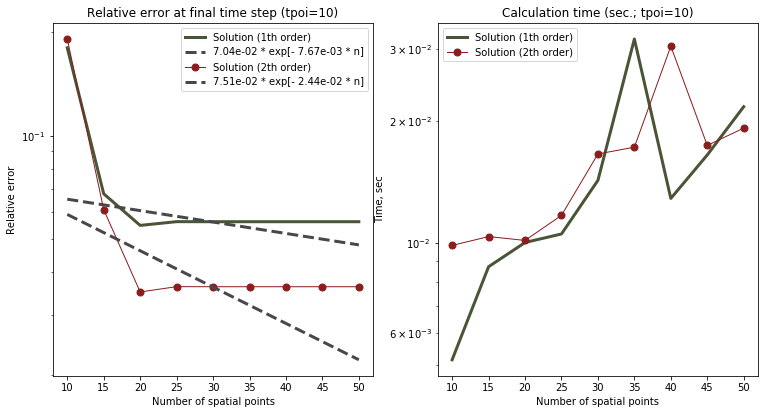

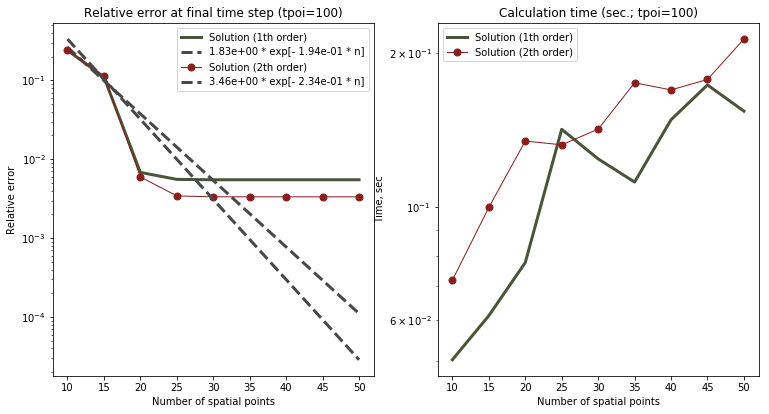

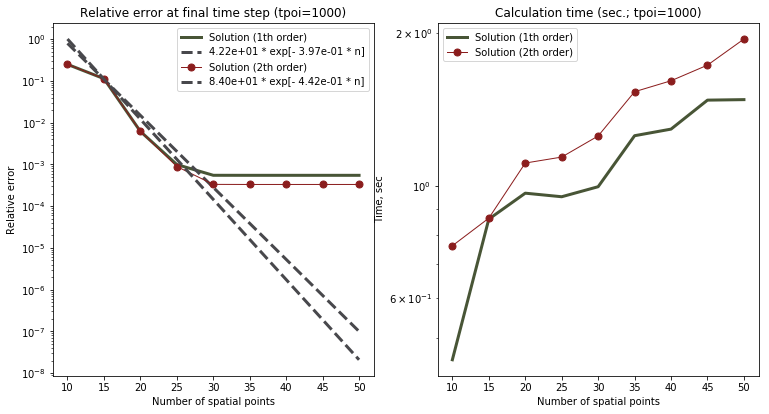

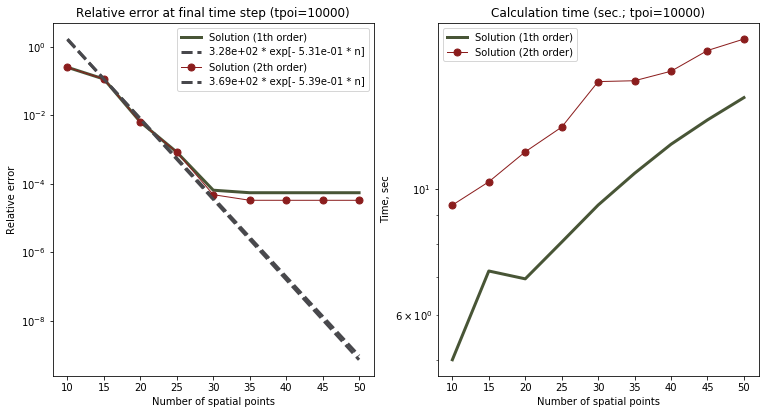

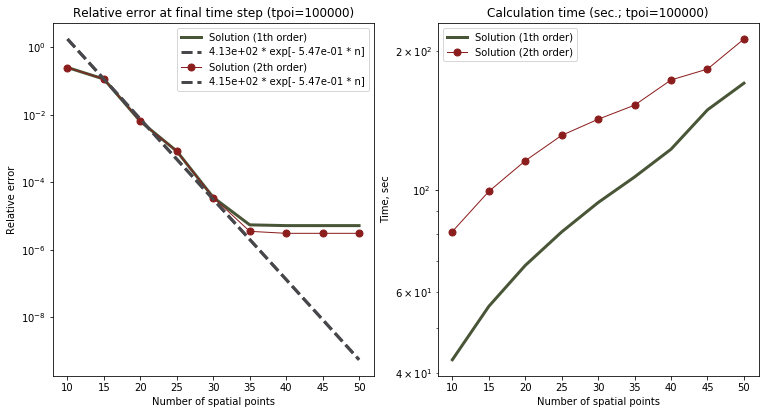

In [3]:
show_ords(DATA, lim)

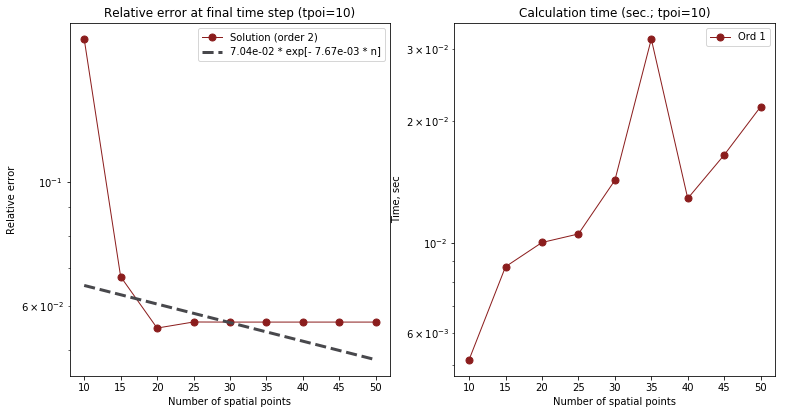

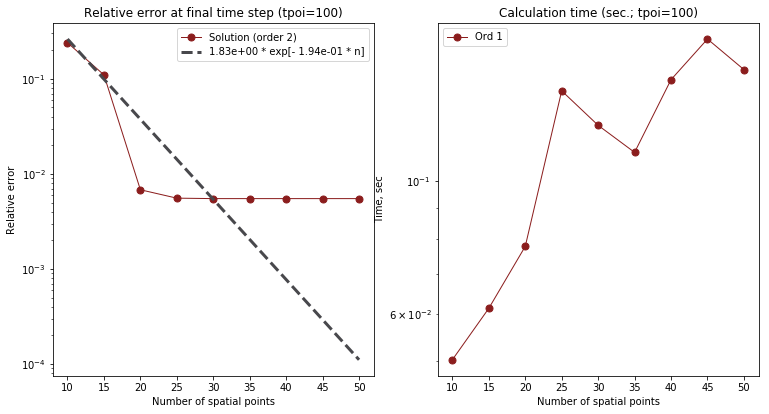

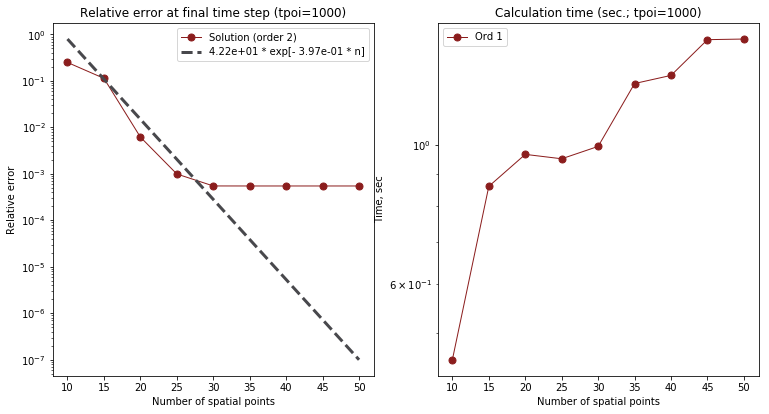

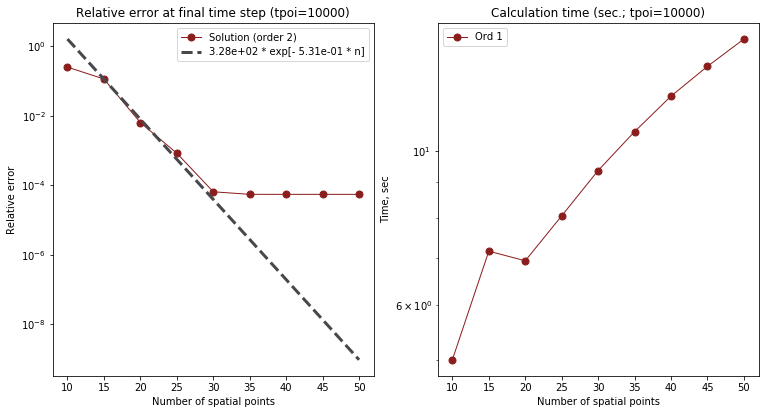

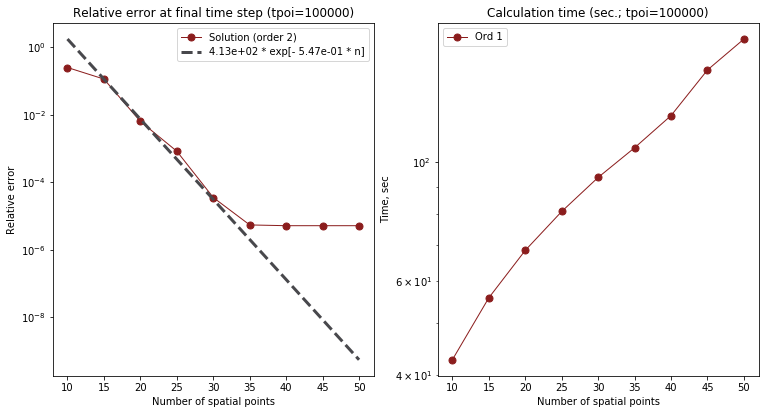

In [3]:
show_ord(DATA, 1, lim)

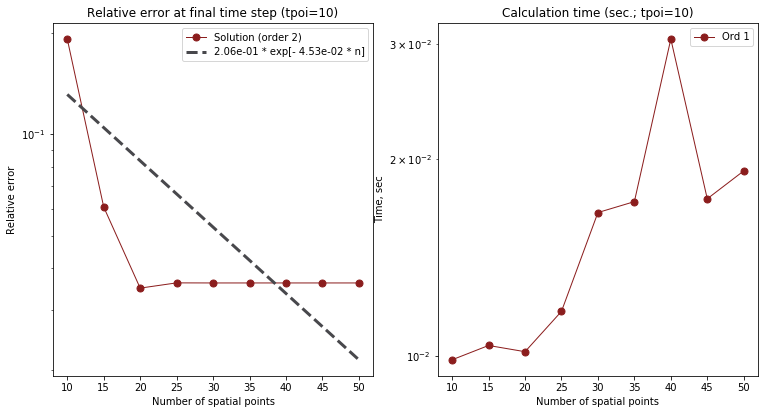

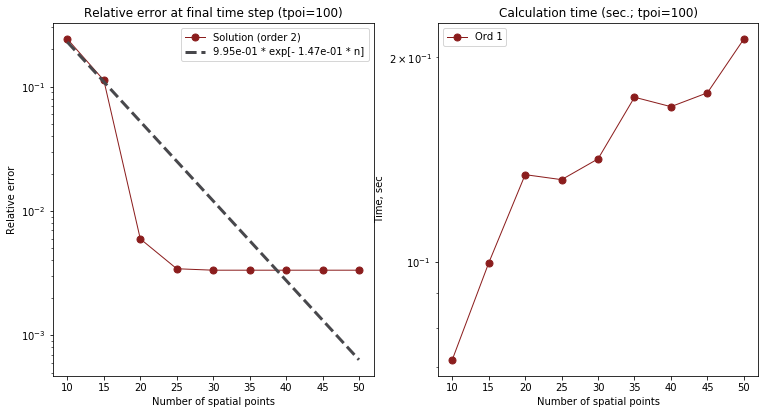

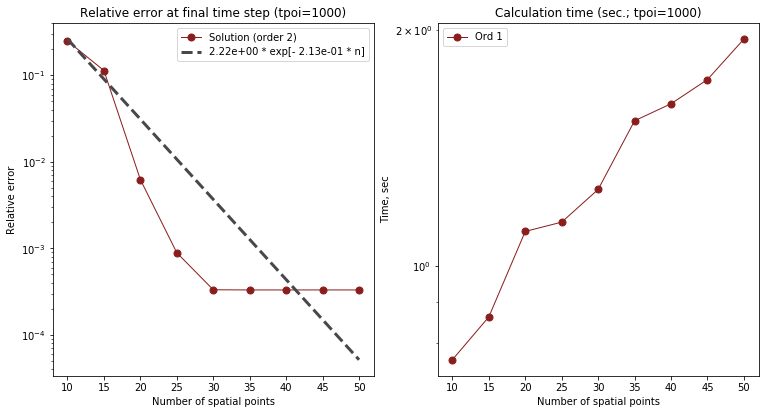

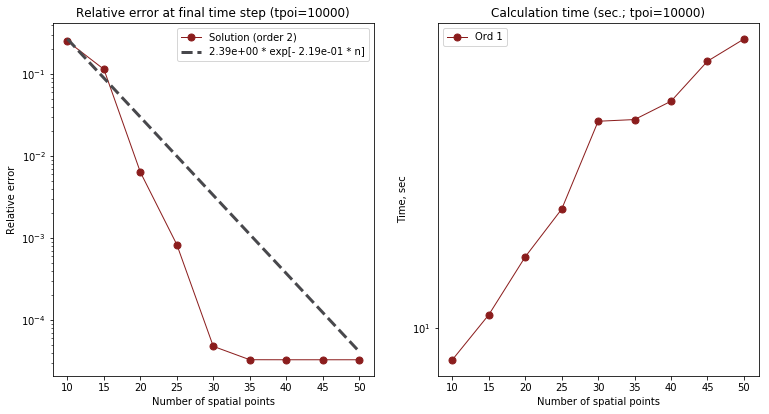

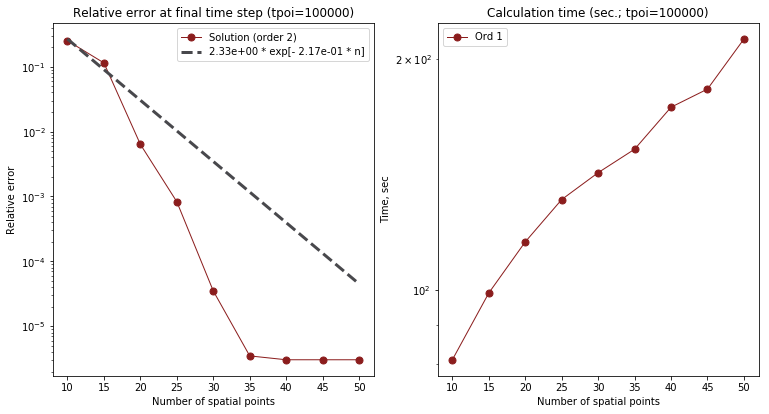

In [10]:
show_ord(DATA, 2)

<div class="end"></div>